In [1]:
import os
os.chdir("/Users/ieo5776/Desktop/signal_processing_course/")
from tools import spectral
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fftpack
import scipy.signal
import scipy.io.wavfile
import scipy.signal
import copy

# Spectral Analysis

In this notebook i'll try to plot a time-frequency plot (spectrogram) of a signal without using any built in functions.  
This signal is called a Chirp, a sine wave that increases in frequency  up to a point, then decreases and stabilizes.  
1) Cut up the signal in windows (500ms non overlapping) --> epochs
2) compute the power spectrum for each with FFT and store each separate spectral window in a matrix
3) Shape of power should be (frequency, epoch)

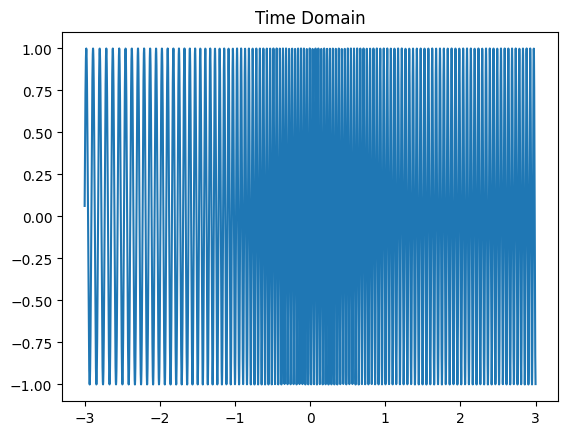

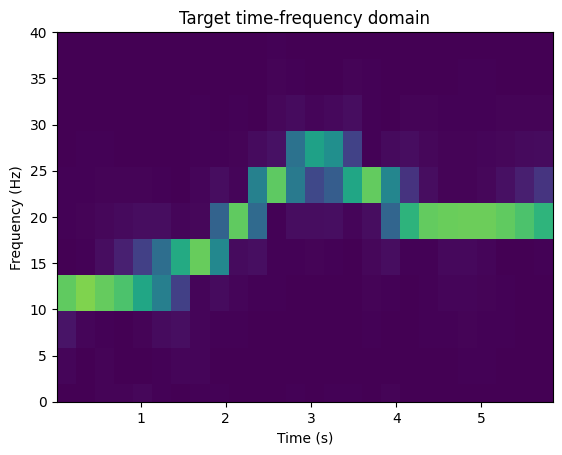

In [2]:
# Load spectral signal
mat = scipy.io.loadmat("SignalProcessing/spectral/spectral_codeChallenge.mat")
signal = mat['signal'][0]
time = mat['time'][0]
srate = mat['srate'][0]

# have a look at the time domain
plt.plot(time, signal)
plt.title('Time Domain')
plt.show()

# this is what it should look like
frex,time_spect,pwr = scipy.signal.spectrogram(signal,srate)

plt.pcolormesh(time_spect,frex,pwr,vmin=0,vmax=0.15)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Target time-frequency domain')
plt.ylim((0,40))
plt.show()

# Implementation

It was actually quite straight forward this time. Loop over each epoch chunk, compute the power spectrum and save it into a power matrix. The hardest part was figuring out the shape of the power spectra.

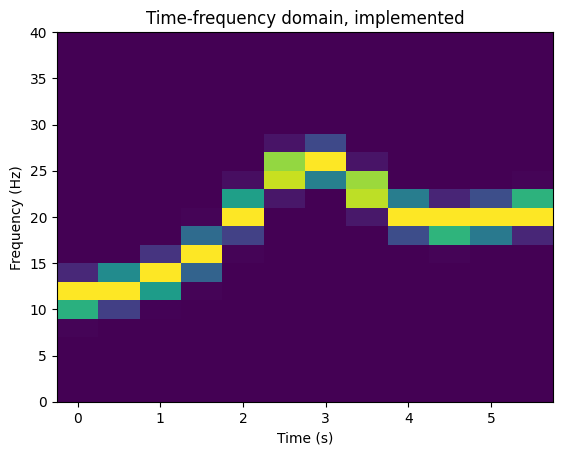

In [10]:
# Set spectral window to 500ms
winlength = int( srate/2 )

N= len(signal)

# window onset times, where to start each FT
epoch = np.arange(0,int(N-winlength),int(winlength))

# Hz vector reshape for epoch
hzW = np.linspace(0,srate/2,int(np.floor(winlength/2)+1))

# Hann window
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,int(winlength)))/2

# matrix of power should be (frequency, time)
pwr_spct = np.zeros((len(hzW), len(epoch)))

for i in range(0, len(epoch)):

    tmp = signal[epoch[i]:epoch[i]+winlength] * hannw

    tmp_power = np.abs(scipy.fftpack.fft(tmp)/winlength)**2

    pwr_spct[:,i] = tmp_power[0:len(hzW)]


plt.pcolormesh(epoch/1000,hzW,pwr_spct,vmin=0,vmax=0.05)
plt.xlabel('Time (s)'), plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency domain, implemented')
plt.ylim((0,40))
plt.show()